In [1]:
#考虑一个具有两个隐藏层的 3 类别分类神经网络，结构如下：

#一个输入节点 (x) (输入一个批次的 (X))
#第一个隐藏层，包含 2 个 神经元 (h^{(1)}_1, h^{(1)}_2)，使用 ReLU 激活函数。
#第二个隐藏层，包含 2 个 神经元 (h^{(2)}_1, h^{(2)}_2)，使用 ReLU 激活函数。
#3 个 输出节点（对应3个类别），使用 Softmax 激活函数。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#softmax激活函数
def softmax(a):
  a_max = np.max(a, axis=0, keepdims=True)
  z = np.exp(a - a_max)

  sums = np.sum(z, axis=0, keepdims=True)
  return z / sums

In [21]:
#前向传播，求输出y_pred
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = np.dot(x, w1) + b1 #shape (2,2)
  h1 = np.maximum(0, z1)

  z2 = np.dot(h1, w2) + b2 #shape (2,2)
  h2 = np.maximum(0, z2)

  z3 = np.dot(h2, w3) + b3 #shape (2,3)
  y_pred = softmax(z3) #shape (2,3)

  return h1, h2, z1, z2, y_pred

In [61]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / y_pred.shape[0]
  return loss

In [18]:
#反向传播，求梯度计算
def backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x):
  dz3 = y_pred - y_true #shape (2,3)
  b3_grad = np.mean(dz3, axis=0, keepdims=True)
  w3_grad = np.dot(h2.T, dz3) / h2.shape[0] #shape (2,3)

  dh2 = np.dot(dz3, w3.T) #shape (2,2)
  dz2 = dh2 * (z2>0)
  b2_grad = np.mean(dz2, axis=0, keepdims=True)
  w2_grad = np.dot(h1.T, dz2) / h1.shape[0] #shape(2,2)

  dh1 = np.dot(dz2, w2.T) #shape (2,2)
  dz1 = dh1 * (z1>0)
  b1_grad = np.mean(dz1, axis=0, keepdims=True) #shape (1,2)
  w1_grad = np.dot(x.T, dz1) #shape (1,2)

  return w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad

In [59]:
#更新参数
def update_parms(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  w3 -= learning_rate * w3_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  b3 -= learning_rate * b3_grad
  return w1, w2, w3, b1, b2, b3

Epoch: 1 loss 0.631 y_pred [0.532  0.4875 0.4678 0.468  0.5125 0.5322] w1 [ 0.5 -0.1] w2 [ 0.3 -0.4  0.1  0.2] w3 [ 0.4 -0.2  0.1 -0.3  0.1  0.5] b1 [ 0.2 -0.2] b2 [-0.1  0.3] b3 [ 0.1  -0.11  0.2 ]
Epoch: 101 loss 0.5655 y_pred [0.5808 0.4748 0.4443 0.4192 0.5252 0.5557] w1 [ 0.65 -0.1 ] w2 [ 0.41 -0.45  0.1   0.2 ] w3 [ 0.45 -0.26  0.04 -0.38  0.01  0.58] b1 [ 0.27 -0.2 ] b2 [0.03 0.42] b3 [ 0.1  -0.61  0.2 ]
Epoch: 201 loss 0.4486 y_pred [0.6652 0.4411 0.387  0.3348 0.5589 0.613 ] w1 [ 0.86 -0.1 ] w2 [ 0.59 -0.49  0.1   0.2 ] w3 [ 0.55 -0.43 -0.07 -0.47 -0.13  0.69] b1 [ 0.38 -0.2 ] b2 [0.19 0.61] b3 [ 0.1 -1.1  0.2]
Epoch: 301 loss 0.2461 y_pred [0.824  0.2856 0.2581 0.176  0.7144 0.7419] w1 [ 1.18 -0.1 ] w2 [ 0.9 -0.5  0.1  0.2] w3 [ 0.69 -0.8  -0.24 -0.57 -0.36  0.8 ] b1 [ 0.54 -0.2 ] b2 [0.49 0.86] b3 [ 0.1 -1.6  0.2]
Epoch: 401 loss 0.0848 y_pred [0.9433 0.0724 0.1052 0.0567 0.9276 0.8948] w1 [ 1.5 -0.1] w2 [ 1.19 -0.54  0.1   0.2 ] w3 [ 0.8  -1.33 -0.42 -0.62 -0.78  0.89] b1 [

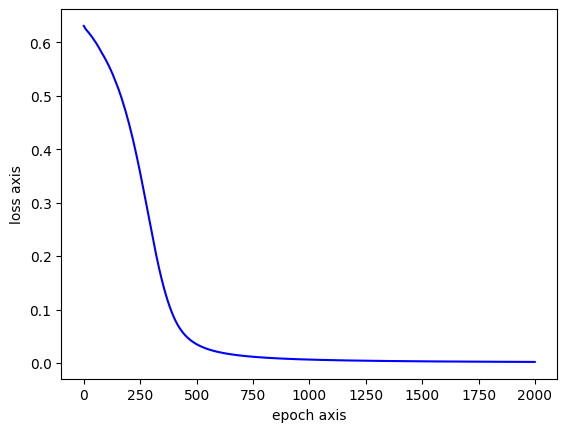

In [62]:
#参数初始化
w1 = np.array([[0.5, -0.1]]) #shape (1,2)

b1 = np.array([[0.2, -0.2]]) #shape (1,2)

w2 = np.array([[0.3, -0.4],
        [0.1, 0.2]]) #shape (2,2)

b2 = np.array([[-0.1, 0.3]]) #shape (1,2)

w3 = np.array([[0.4, -0.2, 0.1],
        [-0.3, 0.1, 0.5]]) #shape (2,3)

b3 = np.array([[0.1, -0.1, 0.2]]) #shape (1,3)

x = np.array([[1.0],
        [-1.0]]) #shape (2,1)

y_true = np.array([[1, 0, 0],
          [0, 0, 1]]) #shape (2,3)

learning_rate = 0.01
losses = []

epochs = 2000

for epoch in range(epochs):
  h1, h2, z1, z2, y_pred = forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss)

  w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad = backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x)
  w1, w2, w3, b1, b2, b3 = update_parms(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate)

  if epoch%100 == 0:
    print("Epoch:", epoch + 1,
      "loss", np.round(loss, 4),
      "y_pred", np.round(y_pred.flatten(), 4),
      "w1", np.round(w1.flatten(), 2),
      "w2", np.round(w2.flatten(), 2),
      "w3", np.round(w3.flatten(), 2),
      "b1", np.round(b1.flatten(), 2),
      "b2", np.round(b2.flatten(), 2),
      "b3", np.round(b3.flatten(), 2),
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()


In [28]:
import torch
import matplotlib.pyplot as plt

In [45]:
#前向传播,输出y_pred
def th_forward(w1, w2, w3, b1, b2, b3, x):
  z1 = torch.matmul(x, w1) + b1 #shape (2,2)
  h1 = torch.relu(z1)

  z2 = torch.matmul(h1, w2) + b2 #shape (2,2)
  h2 = torch.relu(z2)

  z3 = torch.matmul(h2, w3) + b3 #shape (2,3)
  y_pred = torch.softmax(z3, dim=1) #shape (2,3)
  return y_pred

In [63]:
#求损失函数loss
def th_compute_loss(y_pred, y_true):
  loss = -torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_pred.shape[0]
  return loss

Epoch: 1 loss: 0.9565 y_pred: 0.3333 w1: [ 0.5 -0.1] w2: [ 0.3 -0.4  0.1  0.2] w3: [ 0.4 -0.2  0.1 -0.3  0.1  0.5] b1: [ 0.2 -0.2] b2: [-0.1  0.3] b3: [ 0.1 -0.1  0.2]
Epoch: 11 loss: 0.9363 y_pred: 0.3333 w1: [ 0.51 -0.1 ] w2: [ 0.31 -0.41  0.1   0.2 ] w3: [ 0.4  -0.2   0.1  -0.3   0.1   0.51] b1: [ 0.21 -0.2 ] b2: [-0.08  0.3 ] b3: [ 0.12 -0.13  0.21]
Epoch: 21 loss: 0.9190 y_pred: 0.3333 w1: [ 0.52 -0.1 ] w2: [ 0.32 -0.42  0.1   0.2 ] w3: [ 0.41 -0.2   0.09 -0.31  0.09  0.52] b1: [ 0.22 -0.2 ] b2: [-0.07  0.31] b3: [ 0.14 -0.16  0.22]
Epoch: 31 loss: 0.9022 y_pred: 0.3333 w1: [ 0.53 -0.1 ] w2: [ 0.33 -0.43  0.1   0.2 ] w3: [ 0.41 -0.21  0.09 -0.31  0.09  0.53] b1: [ 0.23 -0.2 ] b2: [-0.06  0.32] b3: [ 0.15 -0.18  0.23]
Epoch: 41 loss: 0.8854 y_pred: 0.3333 w1: [ 0.54 -0.1 ] w2: [ 0.34 -0.43  0.1   0.2 ] w3: [ 0.42 -0.21  0.09 -0.32  0.08  0.54] b1: [ 0.24 -0.2 ] b2: [-0.04  0.33] b3: [ 0.17 -0.2   0.24]
Epoch: 51 loss: 0.8690 y_pred: 0.3333 w1: [ 0.54 -0.1 ] w2: [ 0.35 -0.44  0.1   

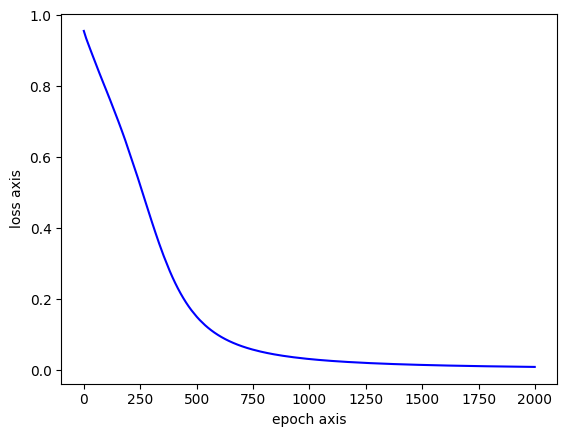

In [64]:
#参数初始化
w1 = torch.tensor([[0.5, -0.1]],requires_grad=True) #shape (1,2)

b1 = torch.tensor([[0.2, -0.2]],requires_grad=True) #shape (1,2)

w2 = torch.tensor([[0.3, -0.4],
          [0.1, 0.2]],requires_grad=True) #shape (2,2)

b2 = torch.tensor([[-0.1, 0.3]],requires_grad=True) #shape (1,2)

w3 = torch.tensor([[0.4, -0.2, 0.1],
          [-0.3, 0.1, 0.5]],requires_grad=True) #shape (2,3)

b3 = torch.tensor([[0.1, -0.1, 0.2]],requires_grad=True) #shape (1,3)

x = torch.tensor([[1.0],
          [-1.0]]) #shape (2,1)

y_true = torch.tensor([[1, 0, 0],
            [0, 0, 1]]) #shape (2,3)

learning_rate = 0.01
losses = []

epochs = 2000

for epoch in range(epochs):
  y_pred = th_forward(w1, w2, w3, b1, b2, b3, x)
  loss = th_compute_loss(y_pred, y_true)
  losses.append(loss.item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    b3.grad.zero_()

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w3 -= learning_rate * w3.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad
    b3 -= learning_rate * b3.grad

  if epoch%10 == 0:
    print(f"Epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}",
      f"y_pred: {y_pred.mean().item():.4f}",
      f"w1: {w1.flatten().detach().numpy().round(2)}",
      f"w2: {w2.flatten().detach().numpy().round(2)}",
      f"w3: {w3.flatten().detach().numpy().round(2)}",
      f"b1: {b1.flatten().detach().numpy().round(2)}",
      f"b2: {b2.flatten().detach().numpy().round(2)}",
      f"b3: {b3.flatten().detach().numpy().round(2)}",
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()